# **Business Understanding**

## **Athlete360 — Predictive Analytics for Performance, Injury, and Mindset**

---

###  **Business Idea**

Modern sports organizations collect massive amounts of performance and training data, yet most insights remain siloed — physical performance metrics are rarely analyzed alongside mental readiness indicators.
**Athlete360** aims to bridge that gap by developing a data-driven system that integrates player performance statistics, workload metrics, and psychological sentiment data to provide a holistic view of athlete readiness.

This system will help **coaches, analysts, and athletes** make more informed decisions about:

* Player rotation and rest,
* Training focus and recovery strategies,
* Injury prevention,
* And performance optimization under pressure.

---

### **Vision**

> **To create an intelligent analytics platform that merges physical performance and mental state indicators, enabling smarter, safer, and more personalized coaching decisions.**

Athlete360 envisions an ecosystem where **AI supports human intuition** — empowering athletes to perform better while reducing risk of overtraining or injury.

---

### **Project Objectives**

|     | Objective                                                  | Description                                                                                                                                  |
| ----- | ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **1** | **Predict Game Performance**                               | Build a machine learning model that forecasts next-game player performance based on past statistics, opponent strength, and fatigue metrics. |
| **2** | **Recommend Training Focus**                               | Develop a clustering-based recommender that suggests personalized training adjustments based on performance trends.                          |
| **3** | **Estimate Injury Risk**                                   | Use workload and fatigue indicators to flag players at elevated injury risk.                                                                 |
| **4** | **Incorporate Sentiment Insights (Stretch Goal)**          | Integrate basic sentiment analysis from player/coach statements to explore correlations between mindset and performance.                     |
| **5** | **Unify Metrics into an Athlete Intelligence Index (AII)** | Combine model outputs into a single composite score to represent overall athlete readiness.                                                  |

---

### **Business Success Metrics**

| Category                 | Metric                                          | Success Criteria                                                   |
| ------------------------ | ----------------------------------------------- | ------------------------------------------------------------------ |
| **Predictive Accuracy**  | Model R² or RMSE for performance prediction     | R² ≥ 0.70 or RMSE ≤ 3 points                                       |
| **Actionability**        | Interpretability and clarity of recommendations | Recommendations easily understood by non-technical users (coaches) |
| **Usability**            | Streamlit dashboard prototype                   | Interactive dashboard showing player insights and AII              |
| **Innovation**           | Integration of physical + mental indicators     | Demonstrates cross-domain modeling (sports + sentiment)            |
| **Scalability (Future)** | System design extensibility                     | Ability to scale with more seasons or other sports data            |

---

### **Key Business Questions**

1. Can we accurately predict an athlete’s next-game performance based on past trends and workload?
2. What statistical patterns indicate a player is entering a fatigue or risk zone?
3. How can training recommendations be generated automatically from player performance clusters?
4. Does emotional sentiment correlate with in-game outcomes or performance drops?
5. Can we combine these insights into a unified **Athlete Intelligence Index (AII)** that summarizes readiness?

---

### **Scope of This Proof of Concept**

This PoC will focus on NBA data (2018–2021) due to API access limitations. It will:

* Validate the **feasibility** of modeling the three core components (performance, training, injury).
* Demonstrate **data-driven insights** through a lightweight Streamlit dashboard.
* Lay the foundation for future extensions into real-time systems and cross-sport applications.

---




##  **CRISP-DM Phase 2: Data Understanding**

###  **Overview**

In this phase, we focus on getting familiar with the dataset — understanding what each column represents, checking data quality, and identifying patterns or potential issues before we move on to cleaning and modeling.

Our dataset was collected using the **NBA API**, covering **player-level game data** from **2018 to 2021**. Each row in the dataset represents a **single player’s performance in one game**, with additional contextual and derived features that describe factors like fatigue, momentum, and opponent strength.

---

###  **Column Descriptions**

Below is a breakdown of all the main columns in the dataset and what each one represents.

| **Category**                             | **Column Name**              | **Description / Meaning**                                                               |
| ---------------------------------------- | ---------------------------- | --------------------------------------------------------------------------------------- |
| **Game Information**                     | `GAME_DATE`                  | The date when the game took place.                                                      |
|                                          | `SEASON_ID`                  | The NBA season identifier (e.g., 2018–19 = 22018).                                      |
|                                          | `Game_ID`                    | Unique ID for each game.                                                                |
|                                          | `MATCHUP`                    | Shows which teams played and who was home/away (e.g., “LAL vs BOS”).                    |
|                                          | `WL`                         | Win or loss result for the player’s team in that game (“W” or “L”).                     |
| **Player Details**                       | `PLAYER_ID`                  | Unique ID for the player.                                                               |
|                                          | `player_name`                | Player’s full name.                                                                     |
|                                          | `TEAM_ABBREVIATION`          | Abbreviation of the player’s team (e.g., “LAL” for Lakers).                             |
|                                          | `OPPONENT_ABBREVIATION`      | Abbreviation of the opposing team.                                                      |
| **Performance Statistics**               | `PTS`                        | Total points scored by the player in the game.                                          |
|                                          | `AST`                        | Number of assists made.                                                                 |
|                                          | `REB`                        | Total rebounds (offensive + defensive).                                                 |
|                                          | `FGM`                        | Field goals made.                                                                       |
|                                          | `FGA`                        | Field goals attempted.                                                                  |
|                                          | `FG_PCT`                     | Field goal percentage (`FGM` / `FGA`).                                                  |
|                                          | `STL`                        | Steals recorded by the player.                                                          |
|                                          | `BLK`                        | Blocks made by the player.                                                              |
|                                          | `TOV`                        | Turnovers committed by the player.                                                      |
|                                          | `PF`                         | Personal fouls committed.                                                               |
|                                          | `PLUS_MINUS`                 | Point differential when the player was on the court.                                    |
| **Fatigue & Schedule Features**          | `days_since_last`            | Days since the player’s previous game.                                                  |
|                                          | `back_to_back`               | Binary flag (1/0) indicating if the game was played on consecutive days.                |
|                                          | `games_last_7`               | Number of games played by the player in the last 7 days.                                |
|                                          | `games_last_30`              | Number of games played in the last 30 days.                                             |
|                                          | `fatigue_index`              | A composite feature estimating the player’s fatigue based on schedule and minutes.      |
|                                          | `gap_days`                   | The gap (in days) between this and the next scheduled game.                             |
| **Rolling Performance (Trend Features)** | `roll_PTS_mean`              | Average points scored over the last N games (rolling window).                           |
|                                          | `roll_PTS_std`               | Standard deviation of points over the last N games — measures consistency.              |
|                                          | `roll_AST_mean`              | Average assists over recent games.                                                      |
|                                          | `roll_FG_PCT_mean`           | Average shooting percentage in recent games.                                            |
|                                          | `roll_TOV_std`               | Turnover variability — how erratic the player’s ball handling has been.                 |
| **Opponent Context**                     | `OPP_DEF_RATING`             | Opponent team’s defensive rating (points allowed per 100 possessions).                  |
|                                          | `OPP_PACE`                   | Opponent’s average pace (possessions per game).                                         |
|                                          | `OPP_SEASON_AVG_PTS_ALLOWED` | Average points allowed by the opponent over the season.                                 |
|                                          | `OPP_FG_PCT_ALLOWED`         | Average field goal percentage allowed by the opponent.                                  |
| **Derived / Custom Features**            | `hot_streak`                 | Binary flag indicating if the player’s recent performance is trending above average.    |
|                                          | `hot_streak_count`           | Number of consecutive “hot” games.                                                      |
|                                          | `last_vs_roll_pts_diff`      | Difference between last game points and rolling average — measures improvement or drop. |

---

###  **Initial Insights**

1. **Coverage:**
   Dataset includes thousands of player-game entries between 2018 and 2021 — sufficient for performance and fatigue modeling.

2. **Completeness:**

   * Core box score data (e.g., points, assists, rebounds) is mostly complete.
   * Rolling features contain missing values for early-season games, since rolling stats require prior games to calculate.

3. **Feature Variety:**
   Dataset includes both raw stats and engineered features, supporting multiple modeling tasks (prediction, clustering, or classification).

---

### **Data Quality Checks**

| **Issue**        | **Explanation**                                                     | **Next Step / Solution**                                      |
| ---------------- | ------------------------------------------------------------------- | ------------------------------------------------------------- |
| Missing values   | Common in rolling and fatigue-related columns early in each season. | Impute using player averages or drop first few games.         |
| Player imbalance | Some players have fewer games recorded (e.g., rookies or injuries). | Focus on players with consistent participation (≥ 100 games). |
| Data scaling     | Metrics have different scales (e.g., PTS vs FG_PCT).                | Standardize before modeling or clustering.                    |
| Time dependency  | Stats are sequential — order matters.                               | Split data by season or use time-aware validation.            |

---

### **Planned Exploratory Analysis**

Our team will conduct the following analyses before modeling:

* Distribution of **points**, **minutes**, and **fatigue index**
* Correlations between **fatigue features** and **performance**
* Rolling trend visualizations (e.g., moving averages)
* Opponent defensive rating vs player output
* Player clustering based on rolling stats and fatigue metrics

---

### **Goal of This Phase**

By the end of the **Data Understanding** phase, our team will:

* Understand what each variable represents
* Verify data quality and consistency
* Identify key predictors for modeling
* Prepare for the **Data Preparation** phase (feature cleaning, scaling, encoding, and train/test splitting)

---

In [1]:
# Importing core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats


In [13]:
# Loading the dataset
df = pd.read_csv("../data/player_game_logs_2018_24_merged.csv")
df

,GAME_DATE,SEASON_ID,Player_ID,Game_ID,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,fatigue_index,gap_days,OPP_SEASON_AVG_BLK,OPP_SEASON_AVG_STL,OPP_DEF_RATING,OPP_PACE,OPP_SEASON_AVG_PTS_ALLOWED,OPP_FG_PCT_ALLOWED,OPP_FG3_PCT_ALLOWED,OPP_PTS_PAINT_ALLOWED
0,2020-12-22,2020_21,2544,22000002,LAL vs. LAC,L,28,7,17,0.412,...,0.777778,999.0,295,509,110.6,97.63,7764.0,0.464,0.356,3400.0
1,2020-12-25,2020_21,2544,22000008,LAL vs. DAL,W,31,8,18,0.444,...,0.961111,3.0,311,450,112.3,97.94,7933.0,0.460,0.365,3256.0
2,2020-12-27,2020_21,2544,22000040,LAL vs. MIN,W,26,6,13,0.462,...,0.922222,2.0,398,632,114.5,101.96,8473.0,0.482,0.392,3584.0
3,2020-12-28,2020_21,2544,22000045,LAL vs. POR,L,36,11,20,0.550,...,1.600000,1.0,363,496,115.3,98.97,8231.0,0.473,0.372,3406.0
4,2020-12-30,2020_21,2544,22000060,LAL @ SAS,W,35,11,23,0.478,...,1.372222,2.0,366,505,112.0,99.45,8123.0,0.472,0.377,3608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459522,2020-08-13,2019_20,1629752,21901314,UTA vs. SAS,W,22,3,4,0.750,...,1.011111,6.0,419,576,111.6,101.11,8854.0,0.464,0.368,3704.0
459523,2020-01-20,2019_20,1629760,21900643,CLE vs. NYK,L,3,1,2,0.500,...,0.083333,999.0,354,535,111.7,99.54,7862.0,0.457,0.374,3080.0
459524,2020-01-28,2019_20,1629760,21900700,CLE vs. NOP,L,2,0,0,0.000,...,0.155556,8.0,392,594,110.7,103.91,8930.0,0.461,0.355,3992.0
459525,2020-03-02,2019_20,1629760,21900902,CLE vs. UTA,L,1,0,0,0.000,...,0.127778,34.0,331,500,108.2,99.34,8495.0,0.454,0.350,3716.0


In [3]:
# Checking the first five rows
df.head()


,GAME_DATE,SEASON_ID,Player_ID,Game_ID,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,fatigue_index,gap_days,OPP_SEASON_AVG_BLK,OPP_SEASON_AVG_STL,OPP_DEF_RATING,OPP_PACE,OPP_SEASON_AVG_PTS_ALLOWED,OPP_FG_PCT_ALLOWED,OPP_FG3_PCT_ALLOWED,OPP_PTS_PAINT_ALLOWED
0,2020-12-22,2020_21,2544,22000002,LAL vs. LAC,L,28,7,17,0.412,...,0.777778,999.0,295,509,110.6,97.63,7764.0,0.464,0.356,3400.0
1,2020-12-25,2020_21,2544,22000008,LAL vs. DAL,W,31,8,18,0.444,...,0.961111,3.0,311,450,112.3,97.94,7933.0,0.460,0.365,3256.0
2,2020-12-27,2020_21,2544,22000040,LAL vs. MIN,W,26,6,13,0.462,...,0.922222,2.0,398,632,114.5,101.96,8473.0,0.482,0.392,3584.0
3,2020-12-28,2020_21,2544,22000045,LAL vs. POR,L,36,11,20,0.550,...,1.600000,1.0,363,496,115.3,98.97,8231.0,0.473,0.372,3406.0
4,2020-12-30,2020_21,2544,22000060,LAL @ SAS,W,35,11,23,0.478,...,1.372222,2.0,366,505,112.0,99.45,8123.0,0.472,0.377,3608.0


In [4]:
# Checking the last five rows
df.tail()

,GAME_DATE,SEASON_ID,Player_ID,Game_ID,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,fatigue_index,gap_days,OPP_SEASON_AVG_BLK,OPP_SEASON_AVG_STL,OPP_DEF_RATING,OPP_PACE,OPP_SEASON_AVG_PTS_ALLOWED,OPP_FG_PCT_ALLOWED,OPP_FG3_PCT_ALLOWED,OPP_PTS_PAINT_ALLOWED
459522,2020-08-13,2019_20,1629752,21901314,UTA vs. SAS,W,22,3,4,0.75,...,1.011111,6.0,419,576,111.6,101.11,8854.0,0.464,0.368,3704.0
459523,2020-01-20,2019_20,1629760,21900643,CLE vs. NYK,L,3,1,2,0.50,...,0.083333,999.0,354,535,111.7,99.54,7862.0,0.457,0.374,3080.0
459524,2020-01-28,2019_20,1629760,21900700,CLE vs. NOP,L,2,0,0,0.00,...,0.155556,8.0,392,594,110.7,103.91,8930.0,0.461,0.355,3992.0
459525,2020-03-02,2019_20,1629760,21900902,CLE vs. UTA,L,1,0,0,0.00,...,0.127778,34.0,331,500,108.2,99.34,8495.0,0.454,0.350,3716.0
459526,2020-03-10,2019_20,1629760,21900962,CLE @ CHI,L,13,0,2,0.00,...,0.461111,8.0,287,695,108.4,100.56,7569.0,0.473,0.350,3412.0


Observations: The data is uniform from top to bottom

In [5]:
# Checking the shape
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} variables")

The dataset has 459527 records and 66 variables


In [6]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459527 entries, 0 to 459526
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_DATE                   459527 non-null  object 
 1   SEASON_ID                   459527 non-null  object 
 2   Player_ID                   459527 non-null  int64  
 3   Game_ID                     459527 non-null  int64  
 4   MATCHUP                     459527 non-null  object 
 5   WL                          459527 non-null  object 
 6   MIN                         459527 non-null  int64  
 7   FGM                         459527 non-null  int64  
 8   FGA                         459527 non-null  int64  
 9   FG_PCT                      459527 non-null  float64
 10  FG3M                        459527 non-null  int64  
 11  FG3A                        459527 non-null  int64  
 12  FG3_PCT                     459527 non-null  float64
 13  FTM           

Observation: The dataset has 59 numerical columns and 7 categorical columns

In [7]:
# Checking statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Player_ID,459527.0,8.271796e+05,717840.654042,1.713000e+03,2.023970e+05,2.039320e+05,1.627885e+06,1.630466e+06
Game_ID,459527.0,2.181551e+07,47645.724306,2.180000e+07,2.180034e+07,2.180068e+07,2.180102e+07,2.200108e+07
MIN,459527.0,2.277545e+01,10.278722,0.000000e+00,1.600000e+01,2.400000e+01,3.100000e+01,5.600000e+01
FGM,459527.0,3.873030e+00,3.131766,0.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00,2.100000e+01
FGA,459527.0,8.405432e+00,5.809630,0.000000e+00,4.000000e+00,7.000000e+00,1.200000e+01,4.100000e+01
FG_PCT,459527.0,4.299337e-01,0.244047,0.000000e+00,2.860000e-01,4.440000e-01,5.710000e-01,1.000000e+00
FG3M,459527.0,1.079808e+00,1.396463,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01
FG3A,459527.0,3.036727e+00,2.891074,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.400000e+01
FG3_PCT,459527.0,2.521525e-01,0.293207,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e-01,1.000000e+00
FTM,459527.0,1.670335e+00,2.290047,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.600000e+01


Observations:

* Data contains wide variability across players and games, as expected in sports performance data.

* Rolling features and fatigue metrics provide additional predictive signals for modeling performance trends.

* Outliers exist in almost every metric  likely reflecting star performances or unusual games and may require inspection or winsorization depending on modeling needs.

##  **CRISP-DM Phase 3: Data Preperation**

In this phase, we prepared the NBA dataset for analysis and modeling by cleaning, standardizing, and organizing the data. Key steps included renaming columns to meaningful names for readability, handling missing values in rolling statistics and verifying data types. This ensures that the dataset is structured, consistent, and ready for exploratory data analysis and subsequent modeling.

In [8]:
# Creating a copy to retain the original dataset
data = df.copy(deep = True)

In [9]:
# Checking the column names
data.columns

Index(['GAME_DATE', 'SEASON_ID', 'Player_ID', 'Game_ID', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'PLAYER_ID', 'player_name',
       'TEAM_ABBREVIATION', 'OPPONENT_ABBREVIATION', 'TEAM_ID', 'OPPONENT_ID',
       'days_since_last', 'back_to_back', 'games_last_7', 'games_last_30',
       'roll_PTS_mean', 'roll_PTS_std', 'roll_AST_mean', 'roll_AST_std',
       'roll_REB_mean', 'roll_REB_std', 'roll_FG_PCT_mean', 'roll_FG_PCT_std',
       'roll_FG3_PCT_mean', 'roll_FG3_PCT_std', 'roll_FTA_mean',
       'roll_FTA_std', 'roll_TOV_mean', 'roll_TOV_std', 'roll_MIN_mean',
       'roll_MIN_std', 'last_vs_roll_pts_diff', 'hot_streak',
       'hot_streak_count', 'fatigue_index', 'gap_days', 'OPP_SEASON_AVG_BLK',
       'OPP_SEASON_AVG_STL', 'OPP_DEF_RATING', 'OPP_PACE',
       'OPP_SEASON_AVG_PTS_ALLOWED', 'OPP_FG_PCT_ALLOWE

In [10]:
# Renaming the column names for ease of understanding
# Dictionary for renaming columns
rename_dict = {
    'SEASON_ID': 'Season',
    'WL': 'Win_Loss',
    'MIN': 'Minutes_Played',
    'TOV' : 'Turnovers',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG_PCT': 'Field_Goal_Pct',
    'FG3M': 'ThreePoints_Made',
    'FG3A': 'ThreePoints_Attempted',
    'FG3_PCT': 'ThreePoints_Pct',
    'FTM': 'FreeThrows_Made',
    'FTA': 'FreeThrows_Attempted',
    'FT_PCT': 'FreeThrow_Pct',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'PTS': 'Points',
    'days_since_last': 'Days_Since_Last_Game',
    'back_to_back': 'Back_To_Back_Games',
    'roll_PTS_mean': 'Rolling_Points_Mean',
    'roll_PTS_std': 'Rolling_Points_Std',
    'roll_AST_mean': 'Rolling_Assists_Mean',
    'roll_AST_std': 'Rolling_Assists_Std',
    'roll_REB_mean': 'Rolling_Rebounds_Mean',
    'roll_REB_std': 'Rolling_Rebounds_Std',
    'roll_FG_PCT_mean': 'Rolling_Field_Goal_Pct_Mean',
    'roll_FG_PCT_std': 'Rolling_Field_Goal_Pct_Std',
    'roll_FG3_PCT_mean': 'Rolling_3Pt_Pct_Mean',
    'roll_FG3_PCT_std': 'Rolling_3Pt_Pct_Std',
    'roll_FTA_mean': 'Rolling_Free_Throws_Mean',
    'roll_FTA_std': 'Rolling_Free_Throws_Std',
    'roll_TOV_mean': 'Rolling_Turnovers_Mean',
    'roll_TOV_std': 'Rolling_Turnovers_Std',
    'roll_MIN_mean': 'Rolling_Minutes_Mean',
    'roll_MIN_std': 'Rolling_Minutes_Std',
    'last_vs_roll_pts_diff': 'Last_vs_Rolling_Points_Diff',
    'hot_streak': 'Hot_Streak_Flag',
    'OPP_SEASON_AVG_BLK': 'Opponent_Avg_Blocks',
    'OPP_SEASON_AVG_STL': 'Opponent_Avg_Steals',
    'OPP_DEF_RATING': 'Opponent_Def_Rating',
    'OPP_PACE': 'Opponent_Pace',
    'OPP_SEASON_AVG_PTS_ALLOWED': 'Opponent_Avg_Points_Allowed',
    'OPP_FG_PCT_ALLOWED': 'Opponent_Field_Goals_Pct_Allowed',
    'OPP_FG3_PCT_ALLOWED': 'Opponent_3Pt_Pct_Allowed',
    'OPP_PTS_PAINT_ALLOWED': 'Opponent_Points_Paint_Allowed'
}

# Apply renaming
data.rename(columns =rename_dict, inplace=True)

#checking if changes have occured
data.columns


Index(['GAME_DATE', 'Season', 'Player_ID', 'Game_ID', 'MATCHUP', 'Win_Loss',
       'Minutes_Played', 'Field_Goals_Made', 'Field_Goals_Attempted',
       'Field_Goal_Pct', 'ThreePoints_Made', 'ThreePoints_Attempted',
       'ThreePoints_Pct', 'FreeThrows_Made', 'FreeThrows_Attempted',
       'FreeThrow_Pct', 'Offensive_Rebounds', 'Defensive_Rebounds',
       'Total_Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal_Fouls', 'Points', 'PLUS_MINUS', 'VIDEO_AVAILABLE',
       'PLAYER_ID', 'player_name', 'TEAM_ABBREVIATION',
       'OPPONENT_ABBREVIATION', 'TEAM_ID', 'OPPONENT_ID',
       'Days_Since_Last_Game', 'Back_To_Back_Games', 'games_last_7',
       'games_last_30', 'Rolling_Points_Mean', 'Rolling_Points_Std',
       'Rolling_Assists_Mean', 'Rolling_Assists_Std', 'Rolling_Rebounds_Mean',
       'Rolling_Rebounds_Std', 'Rolling_Field_Goal_Pct_Mean',
       'Rolling_Field_Goal_Pct_Std', 'Rolling_3Pt_Pct_Mean',
       'Rolling_3Pt_Pct_Std', 'Rolling_Free_Throws_Mean

In [11]:
# Standardizing the column names
data.columns = data.columns.str.lower()

# Convert game_date to datetime
data['game_date'] = pd.to_datetime(data['game_date'])

# Checking if changes have occured
data.columns

Index(['game_date', 'season', 'player_id', 'game_id', 'matchup', 'win_loss',
       'minutes_played', 'field_goals_made', 'field_goals_attempted',
       'field_goal_pct', 'threepoints_made', 'threepoints_attempted',
       'threepoints_pct', 'freethrows_made', 'freethrows_attempted',
       'freethrow_pct', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'plus_minus', 'video_available',
       'player_id', 'player_name', 'team_abbreviation',
       'opponent_abbreviation', 'team_id', 'opponent_id',
       'days_since_last_game', 'back_to_back_games', 'games_last_7',
       'games_last_30', 'rolling_points_mean', 'rolling_points_std',
       'rolling_assists_mean', 'rolling_assists_std', 'rolling_rebounds_mean',
       'rolling_rebounds_std', 'rolling_field_goal_pct_mean',
       'rolling_field_goal_pct_std', 'rolling_3pt_pct_mean',
       'rolling_3pt_pct_std', 'rolling_free_throws_mean

In [12]:
# Checking for missing values
data.isna().sum().any()

np.True_

In [13]:
# Dropping  the missing values
data.dropna(inplace = True)

#Checking if changes have occured
data.isna().sum().any()

np.False_

In [14]:
# Checking for duplicates
data.duplicated().sum()

np.int64(0)

Observations: There are no duplicates in the dataset

##  **CRISP-DM Phase 4: Exploratory Data Analysis**
### Univariate Analysis
Understanding distributions of single variables of points, minutes, fatigue_index,assists, total_rebounds, field_goal_pct,
threepoints_pct, freethrow_pct and turnovers.

In [15]:
data.columns

Index(['game_date', 'season', 'player_id', 'game_id', 'matchup', 'win_loss',
       'minutes_played', 'field_goals_made', 'field_goals_attempted',
       'field_goal_pct', 'threepoints_made', 'threepoints_attempted',
       'threepoints_pct', 'freethrows_made', 'freethrows_attempted',
       'freethrow_pct', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'plus_minus', 'video_available',
       'player_id', 'player_name', 'team_abbreviation',
       'opponent_abbreviation', 'team_id', 'opponent_id',
       'days_since_last_game', 'back_to_back_games', 'games_last_7',
       'games_last_30', 'rolling_points_mean', 'rolling_points_std',
       'rolling_assists_mean', 'rolling_assists_std', 'rolling_rebounds_mean',
       'rolling_rebounds_std', 'rolling_field_goal_pct_mean',
       'rolling_field_goal_pct_std', 'rolling_3pt_pct_mean',
       'rolling_3pt_pct_std', 'rolling_free_throws_mean

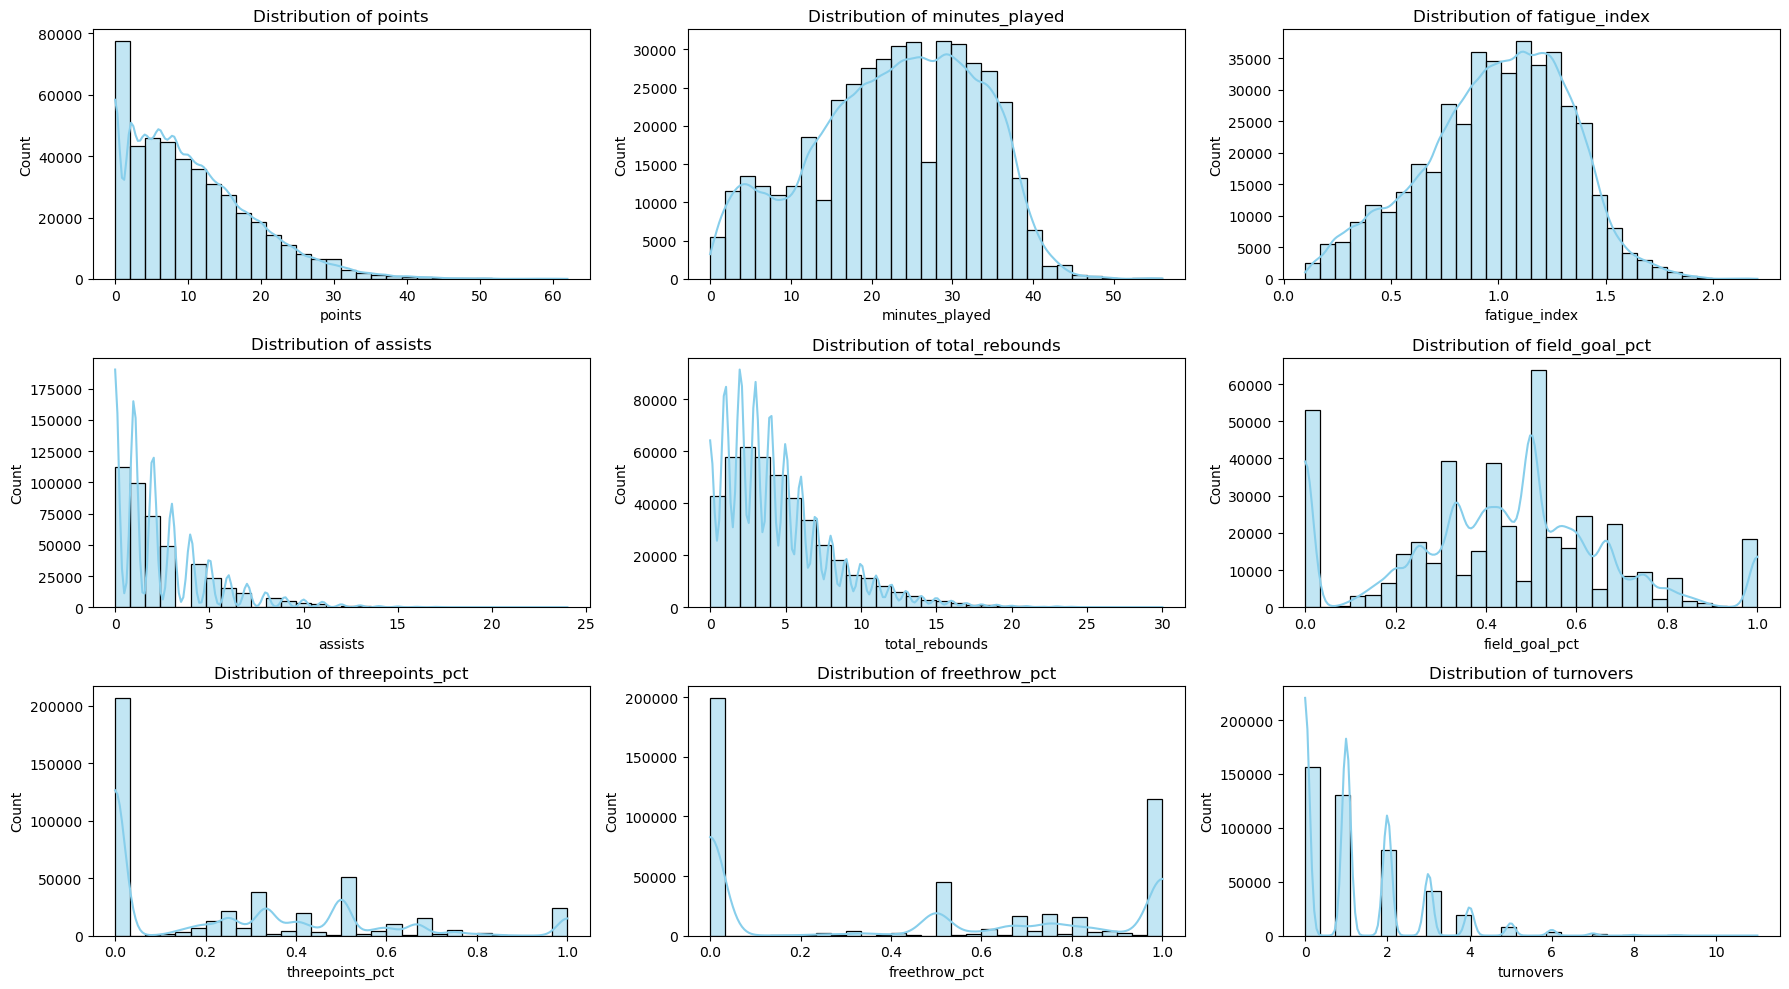

In [16]:
# Numeric columns
numeric_cols = [
    'points', 'minutes_played', 'fatigue_index', 
    'assists', 'total_rebounds', 'field_goal_pct',
    'threepoints_pct', 'freethrow_pct', 'turnovers'
]

# Plot distributions of numerical columns
plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Observations:

* The points distribution is right-skewed  most players score below 25 points per game, with a few high scorers creating a long tail.

* Minutes played show a moderate spread; most players average between 10–35 minutes, suggesting a mix of starters and bench players.

* The fatigue_index follows an approximately normal distribution, indicating that most players experience moderate fatigue levels, with fewer cases of extreme rest or overwork.

* Assists and total rebounds distributions are also right-skewed where a few players consistently dominate these categories.

* Shooting percentages (field_goal_pct, threepoints_pct and freethrow_pct) display uneven or multi-peaked patterns, showing that shooting efficiency varies widely suggesting some players are highly accurate, while others struggle.

* Turnovers are concentrated at lower values, showing most players commit between 0–4 turnovers per game.

## Bivariate Analysis

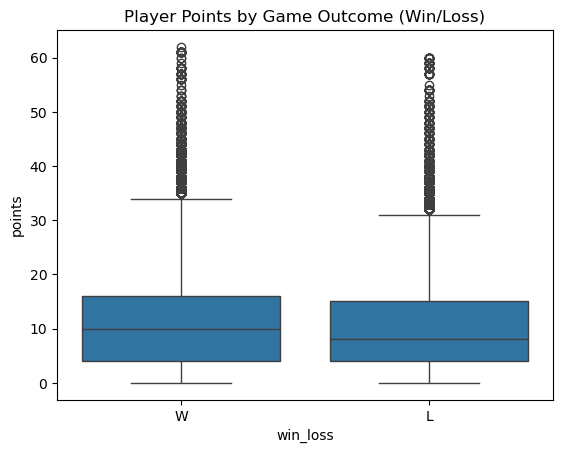

In [ ]:
# Boxplot comparing points scored in wins vs losses.
sns.boxplot(x='win_loss', y='points', data=data)
plt.title("Player Points by Game Outcome (Win/Loss)")
plt.show()


Observations: Players tend to score slightly more points in wins than in losses, though the difference is small and distributions overlap heavily.

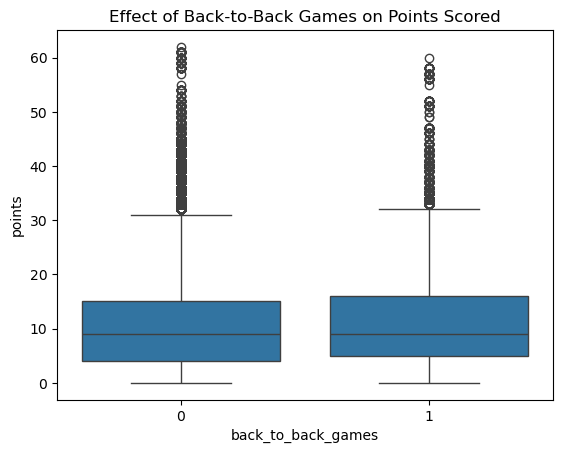

In [ ]:
# Boxplot of points in back-to-back (1) vs rested (0) games.
sns.boxplot(x='back_to_back_games', y='points', data=data)
plt.title("Effect of Back-to-Back Games on Points Scored")
plt.show()


Observations: There is no notable difference in points scored between back-to-back and non–back-to-back games, suggesting minimal fatigue impact on scoring.

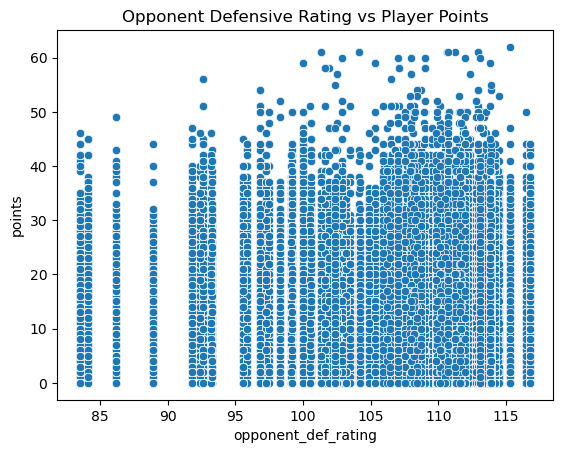

In [ ]:
# Scatter plot of opponent defensive rating against player points.
sns.scatterplot(x='opponent_def_rating', y='points', data=data)
plt.title("Opponent Defensive Rating vs Player Points")
plt.show()


Observations: Player scoring shows little to no correlation with opponent defensive rating, implying that defensive strength alone doesn’t determine scoring output.

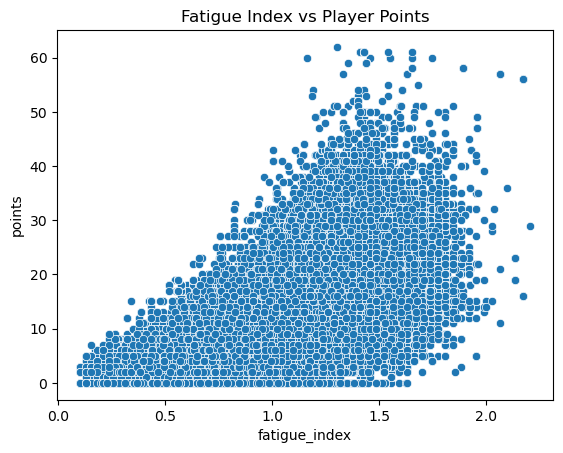

In [ ]:
# Scatter plot comparing fatigue index and player points.
sns.scatterplot(x='fatigue_index', y='points', data=data)
plt.title("Fatigue Index vs Player Points")
plt.show()


Observations: Higher fatigue index values are associated with higher points, indicating that players with heavier workloads tend to score more.

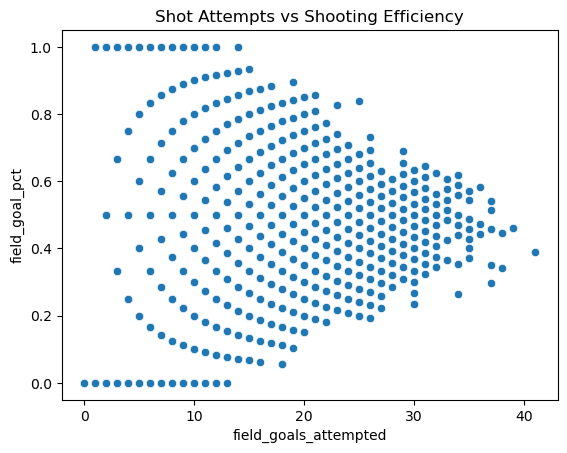

In [ ]:
# Scatter plot of field goal attempts vs field goal percentage.
sns.scatterplot(x='field_goals_attempted', y='field_goal_pct', data=data)
plt.title("Shot Attempts vs Shooting Efficiency")
plt.show()


Observations: As field goal attempts increase, shooting efficiency slightly declines, showing a modest trade-off between volume and accuracy.

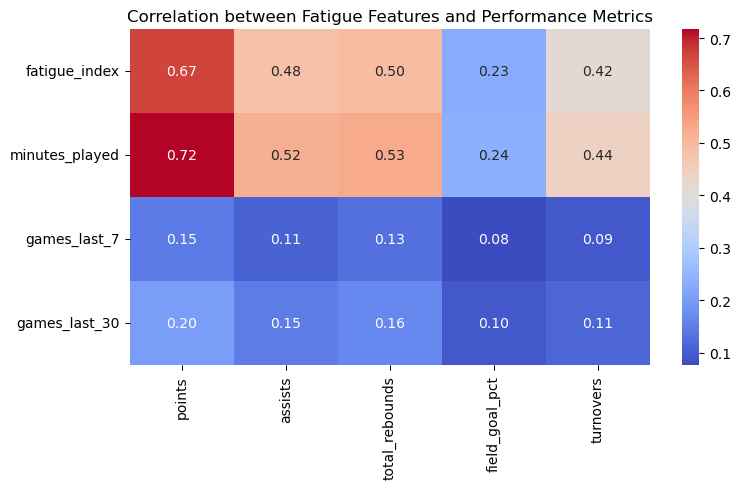

In [ ]:
# Understanding the correlation between fatigue features and performance

#  Define relevant columns
fatigue_features = ['fatigue_index', 'minutes_played', 'games_last_7', 'games_last_30']
performance_features = ['points', 'assists', 'total_rebounds', 'field_goal_pct', 'turnovers']

# Compute correlations between fatigue and performance metrics
corr_data = data[fatigue_features + performance_features].corr()
fatigue_corr = corr_data.loc[fatigue_features, performance_features]

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(fatigue_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Fatigue Features and Performance Metrics')
plt.tight_layout()
plt.show()



Observations:

* Fatigue_index shows a positive correlation with points (0.67), assists (0.48), total_rebounds (0.50), and field_goal_pct (0.23), implying that higher workload players tend to accumulate more counting stats and maintain decent shooting efficiency despite fatigue.

* Minutes_played and fatigue_index are strongly positively correlated, confirming that heavy playing time contributes to higher fatigue levels.

* Turnovers display a moderate positive correlation (0.42) with fatigue, suggesting that players with heavier workloads may make slightly more ball-handling mistakes.

* Games_last_7 and games_last_30 have weaker correlations with performance metrics, indicating that short-term game density affects performance less consistently than cumulative fatigue or playing time.

In [18]:
# scatterplots for key relationships
# plt.figure(figsize=(14, 8))

# plt.subplot(2, 2, 1)
# sns.scatterplot(x='fatigue_index', y='points', data = data, alpha=0.4)
# plt.title('Fatigue Index vs Points')

# plt.subplot(2, 2, 2)
# sns.scatterplot(x='fatigue_index', y='field_goal_pct', data = data, alpha=0.4)
# plt.title('Fatigue Index vs Field Goal %')

# plt.subplot(2, 2, 3)
# sns.scatterplot(x='fatigue_index', y='turnovers', data = data, alpha=0.4)
# plt.title('Fatigue Index vs Turnovers')

# plt.subplot(2, 2, 4)
# sns.scatterplot(x='minutes_played', y='fatigue_index', data = data, alpha=0.4)
# plt.title('Minutes Played vs Fatigue Index')

# plt.tight_layout()
# plt.show()

Observations:

The Fatigue Index vs Points plot shows a mild downward trend, meaning players with higher fatigue levels tend to score slightly fewer points.

Field Goal % also decreases as fatigue increases supporting the idea that tired players shoot less efficiently.

The Turnovers plot shows a light upward trend fatigue might increase the likelihood of errors and lost possessions.

A clear positive linear pattern appears between Minutes Played and Fatigue Index, confirming that more time on court directly contributes to higher fatigue levels.

## Multivariate Analysis
1. Rolling Trend Visualizations (Moving Averages)

We’ll visualize rolling averages of points, assists, and fatigue over games for a few players.

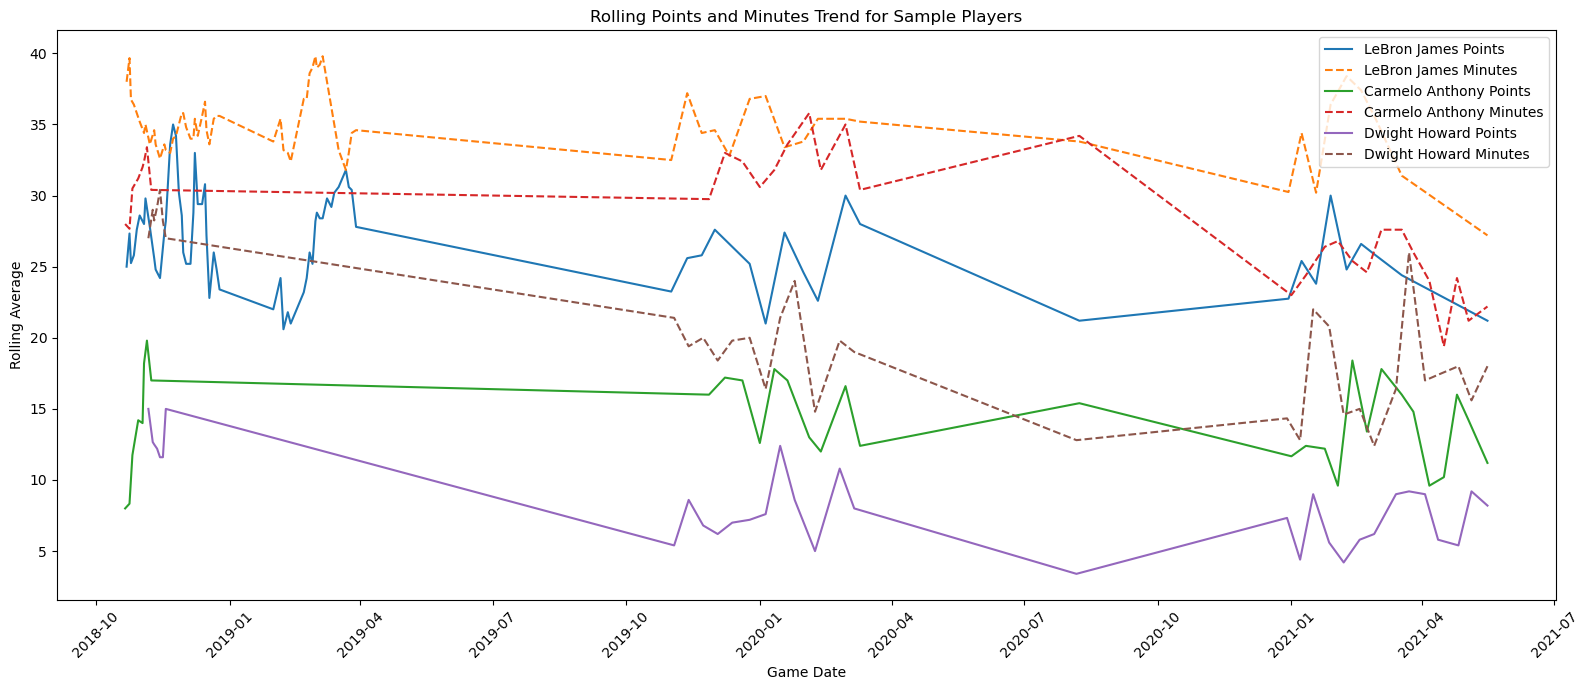

In [19]:
# Select sample players
sample_players = data['player_name'].unique()[:3]

plt.figure(figsize=(16, 7))

for player in sample_players:
    player_data = data[data['player_name'] == player].sort_values('game_date')
    
    # downsample every 5th game for cleaner plotting
    player_data = player_data.iloc[::5, :]
    
    plt.plot(player_data['game_date'], player_data['rolling_points_mean'], label=f'{player} Points')
    plt.plot(player_data['game_date'], player_data['rolling_minutes_mean'], label=f'{player} Minutes', linestyle='--')

plt.xlabel('Game Date')
plt.ylabel('Rolling Average')
plt.title('Rolling Points and Minutes Trend for Sample Players')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()


Observations:

- Players’ rolling points generally rise and fall with rolling minutes, confirming that playing time strongly influences scoring output.

- Periods of higher rolling minutes sometimes correspond to dips in points or efficiency, suggesting that accumulated fatigue can negatively affect performance.

Downsampling every 5 games smooths the visualization and reduces clutter on the x-axis, making trends easier to interpret without losing the overall pattern of performance fluctuations.

2. Opponent Defensive Rating vs Player Output

We’ll examine how player points change against opponents with different defensive ratings.

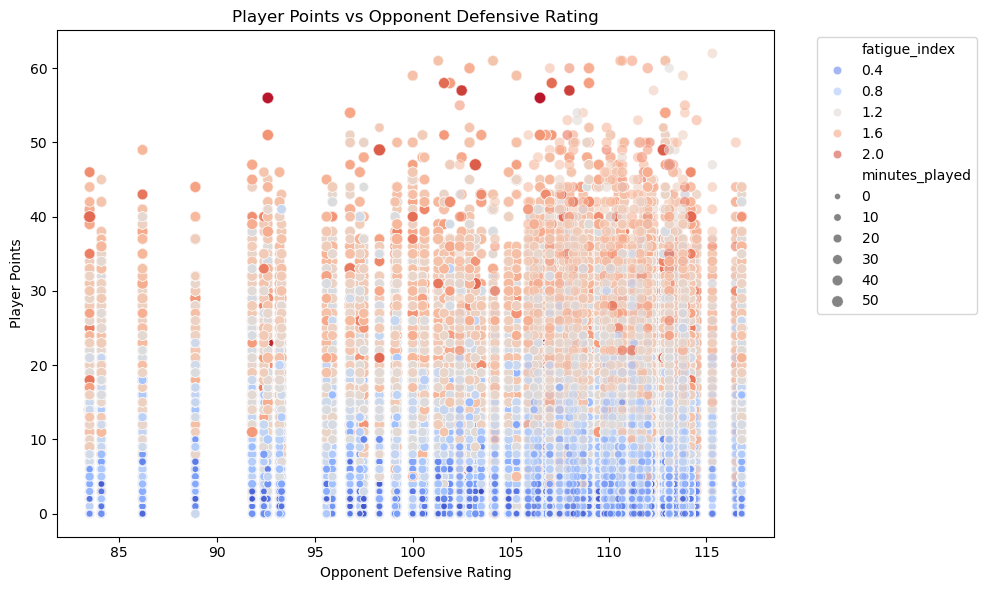

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='opponent_def_rating',
    y='points',
    hue='fatigue_index',
    size='minutes_played',
    palette='coolwarm',
    alpha=0.6
)
plt.xlabel('Opponent Defensive Rating')
plt.ylabel('Player Points')
plt.title('Player Points vs Opponent Defensive Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


Observations:

The scatter plot highlights interactions between fatigue, playing time, and opponent strength, providing insights for performance management and load balancing.

- Points tend to decrease slightly as opponent defensive rating increases, suggesting tougher defenses limit scoring output.

- Players with higher fatigue_index often score fewer points, indicating fatigue reduces offensive effectiveness against strong defenses.

- Minutes played amplifies scoring: players on the court longer generally score more, but even extended minutes may not fully overcome strong opponent defense or fatigue.



3. Player Clustering Based on Rolling Stats and Fatigue

We can cluster players using rolling averages of key stats and fatigue index.


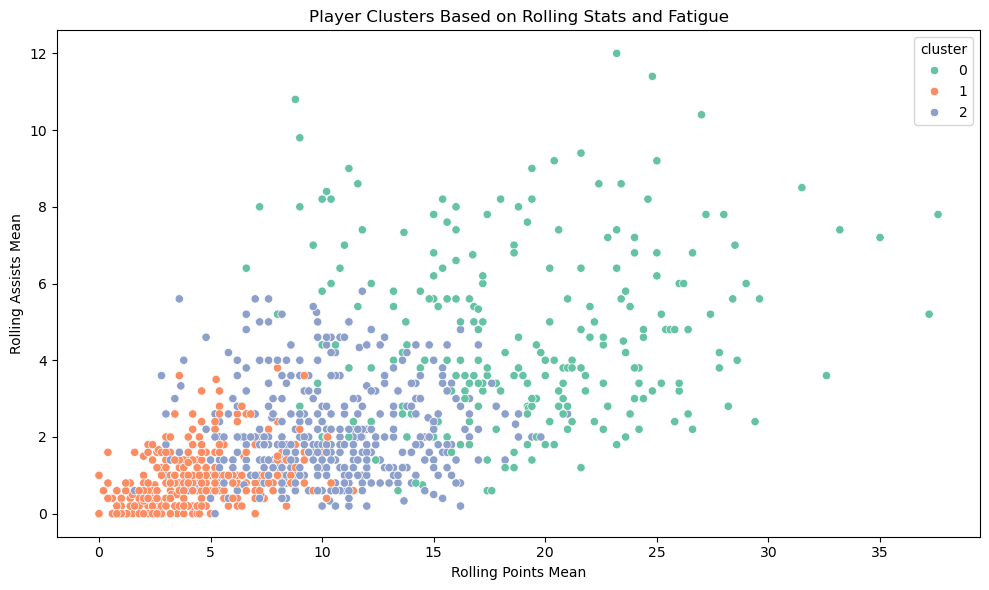

In [21]:
# Select relevant features
features = [
    'rolling_points_mean', 'rolling_assists_mean', 'rolling_rebounds_mean', 
    'rolling_minutes_mean', 'fatigue_index'
]
X = data[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data.sample(1000),  # sample for clarity
    x='rolling_points_mean',
    y='rolling_assists_mean',
    hue='cluster',
    palette='Set2'
)
plt.xlabel('Rolling Points Mean')
plt.ylabel('Rolling Assists Mean')
plt.title('Player Clusters Based on Rolling Stats and Fatigue')
plt.tight_layout()
plt.show()

Observation:
- Players form distinct clusters: high-scoring playmakers, balanced contributors, and low-output or fatigue-prone players.

- Fatigue levels help distinguish players with similar stats—some high-output players exhibit higher fatigue indices.

- Insights from these clusters can guide player management, rotations, and substitution strategies.

## Hypothesis Testing

### Hypothesis test1: Fatigue affects player performance
 H₀: There is no significant relationship between Fatigue index and points scored 

 H₁: There is a significant relationsip between Fatigue index and points scored

In [22]:
median_fatigue = data['fatigue_index'].median()

high_fatigue_points = data.loc[data['fatigue_index'] > median_fatigue, 'points']
low_fatigue_points  = data.loc[data['fatigue_index'] <= median_fatigue, 'points']

f_stat, p_val = stats.f_oneway(high_fatigue_points, low_fatigue_points)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Fatigue significantly affects player points.")   
else:
    print("Fail to reject H₀: No significant difference in points due to fatigue.")


ANOVA F-statistic: 221670.830
p-value: 0.0000
Reject H₀: Fatigue significantly affects player points.


### Hypothesis Test2: Hot streak players perform better
H₀: There is no difference in points between hot and non-hot streak players

H₁: Hot streak players score more points than non-hot streak players

In [23]:
hot_points  = data.loc[data['hot_streak_flag'] == 1, 'points']
cold_points = data.loc[data['hot_streak_flag'] == 0, 'points']

f_stat, p_val = stats.f_oneway(hot_points, cold_points)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.4f}")


if p_val < 0.05:
    print("Reject H₀: Hot streak significantly affects player performance.")
else:
    print("Fail to reject H₀: No significant difference between hot and non-hot players.")


ANOVA F-statistic: 142551.698
p-value: 0.0000
Reject H₀: Hot streak significantly affects player performance.


### Hypothesis Test3: Minutes played affect total points
H₀: There is no significant relationship between minutes played and points scored

H₁:  More minutes lead to higher points scored

In [24]:
r, p_val = stats.pearsonr(data['minutes_played'], data['points'])

print(f"Minutes vs Points Correlation | r = {r:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Minutes played significantly correlate with player points.")
else:
    print("Fail to reject H₀: No significant correlation between minutes and points.")


Minutes vs Points Correlation | r = 0.717, p = 0.0000
Reject H₀: Minutes played significantly correlate with player points.


### Hypothesis Test4: Opponent defensive rating impacts scoring
H₀: There is no significant relationship between Opponent defensive rating and points scored

H₁: Opponent defensive rating correlates with player points

In [25]:
r, p_val = stats.pearsonr(player_data['opponent_def_rating'], player_data['points'])
print(f"Opponent Defense Correlation | r = {r:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Opponent defensive rating significantly affects player scoring.")
else:
    print("Fail to reject H₀: No significant correlation between opponent defense rating and points.")



Opponent Defense Correlation | r = -0.243, p = 0.0894
Fail to reject H₀: No significant correlation between opponent defense rating and points.


### Hypothesis Test5: Rest days affect player performance
H₀: The Points scored are equal across all rest-day categories

H₁: At least one rest-day category differs significantly

In [26]:
groups = [
    data.loc[(data['days_since_last_game'] > -1) & (data['days_since_last_game'] <= 0), 'points'],
    data.loc[(data['days_since_last_game'] > 0) & (data['days_since_last_game'] <= 1), 'points'],
    data.loc[(data['days_since_last_game'] > 1) & (data['days_since_last_game'] <= 2), 'points'],
    data.loc[(data['days_since_last_game'] > 2) & (data['days_since_last_game'] <= 4), 'points'],
    data.loc[(data['days_since_last_game'] > 4) & (data['days_since_last_game'] <= 7), 'points'],
    data.loc[(data['days_since_last_game'] > 7), 'points']
]

f_stat, p_val = stats.f_oneway(*[g for g in groups if len(g) > 0])
print(f"Rest Days ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Rest days significantly affect player points.")
else:
    print("Fail to reject H₀: No significant difference across rest-day groups.")


Rest Days ANOVA F-statistic: 2305.138
p-value: 0.0000
Reject H₀: Rest days significantly affect player points.
